In [5]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


# 2. 데이터 전처리(주말여부 원핫인코딩, 이상치 데이터처리)

- 반품데이터 경우, EA(판매량) 마이너스로, 모델 학습시 성능을 떨어뜨리는 요인으로 판단됨.
- 판매일,상품명,EA 절대값을 기준으로 매출데이터와 반품데이터를 상쇄시켜서 이상치 데이터를 제거함

In [6]:
import pandas as pd

df = pd.read_csv("./outputs/data/df_1.csv")
df['년월'] = pd.to_datetime(df['년월'])

def get_season(month):
    if 3 <= month <= 5:
        return '봄'
    elif 6 <= month <= 8:
        return '여름'
    elif 9 <= month <= 11:
        return '가을'
    else:
        return '겨울'

df['계절'] = df['년월'].dt.month.apply(get_season)

# Define COVID-19 period (example: Jan 2020 to Dec 2022)
covid_start_date = pd.to_datetime('2020-03-01')
covid_end_date = pd.to_datetime('2021-12-31')

df['코로나여부'] = ((df['년월'] >= covid_start_date) & (df['년월'] <= covid_end_date)).astype(int)
df['주말여부'] = df['년월'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)
display(df[df['EA'] < 0])

,판매일,EA,주소,시도,시군,구,기온,상품명_cleaned,제로구분,년월,평균기온,평균 상대습도(%),일강수량(mm),평균 풍속(m/s),합계 일조시간(hr),평균 지면온도(°C),계절,코로나여부,주말여부
378,2021-02-28,-6,경상남도 창원시 의창구 동정길,경상남도,창원시,의창구,8.0,칠성사이다,일반,2021-02-01,8.0,63.0,0.0,1.5,1.5,7.9,겨울,1,0
379,2021-02-28,-8,경상남도 창원시 의창구 동정길,경상남도,창원시,의창구,8.0,칠성사이다,일반,2021-02-01,8.0,63.0,0.0,1.5,1.5,7.9,겨울,1,0
711,2021-02-28,-20,경상남도 창원시 진해구 동진로,경상남도,창원시,진해구,8.0,칠성사이다,일반,2021-02-01,8.0,63.0,0.0,1.5,1.5,7.9,겨울,1,0
821,2021-03-31,-14,경상남도 창원시 마산회원구 봉덕2길,경상남도,창원시,마산회원구,12.4,데미소다오렌지,일반,2021-03-01,12.4,61.4,NaN,1.5,10.7,13.2,봄,1,0
1369,2021-04-30,-2,경상남도 창원시 마산회원구 3·15대로,경상남도,창원시,마산회원구,16.8,데미소다오렌지,일반,2021-04-01,16.8,40.3,1.0,1.8,11.6,19.3,봄,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42825,2024-12-20,-48,대구광역시 중구 달구벌대로,대구광역시,중구,달구벌대로,1.8,코카콜라제로,제로,2024-12-01,1.8,56.6,NaN,1.5,4.6,1.3,겨울,0,1
42858,2024-12-30,-20,대구광역시 중구 달구벌대로,대구광역시,중구,달구벌대로,4.5,펩시콜라,일반,2024-12-01,4.5,62.6,NaN,1.8,5.4,2.5,겨울,0,1
42863,2024-12-30,-16,대구광역시 중구 달구벌대로,대구광역시,중구,달구벌대로,4.5,코카콜라,일반,2024-12-01,4.5,62.6,NaN,1.8,5.4,2.5,겨울,0,1
42864,2024-12-30,-24,대구광역시 중구 달구벌대로,대구광역시,중구,달구벌대로,4.5,코카콜라,일반,2024-12-01,4.5,62.6,NaN,1.8,5.4,2.5,겨울,0,1


In [7]:
import pandas as pd

# -----------------------------
# 2) 날짜형 변환 + 기본 기술통계
# -----------------------------
df["판매일"] = pd.to_datetime(df["판매일"], errors="coerce")
#df['month'] = df['판매일'].dt.month # Extract month after converting to datetime
#df['계절'] = df['month'].apply(get_season)

display(df.columns)

# 한글 컬럼 그대로 씀: [판매일, EA, 주소, 시도, 시군, 구, 기온, 상품명_cleaned, 제로구분, 년월, 계절, 코로나여부, month]
print("원본 데이터 shape:", df.shape)
print(df.head())


# 1단계에서 쓸 핵심 변수만 기술통계 확인
print("\n=== 기술통계(판매량 EA / 기온) ===")
print(df[["EA", "기온"]].describe())

# 결측치 체크
print("\n=== 결측치 개수(EA, 기온, 계절) ===")
print(df[["EA", "기온", "계절"]].isna().sum())

# 분석에 필요한 행만 남김
df = df.dropna(subset=["EA", "기온", "계절"]).copy() # Include '계절' in dropna subset
print("\n결측치 제거 후 shape:", df.shape)

Index(['판매일', 'EA', '주소', '시도', '시군', '구', '기온', '상품명_cleaned', '제로구분', '년월',
       '평균기온', '평균 상대습도(%)', '일강수량(mm)', '평균 풍속(m/s)', '합계 일조시간(hr)',
       '평균 지면온도(°C)', '계절', '코로나여부', '주말여부'],
      dtype='object')

원본 데이터 shape: (42871, 19)
         판매일  EA                     주소    시도   시군      구   기온 상품명_cleaned  \
0 2021-01-31  30  경상남도 창원시 마산합포구 3·15대로  경상남도  창원시  마산합포구  5.4       칠성사이다   
1 2021-01-31  24  경상남도 창원시 마산합포구 3·15대로  경상남도  창원시  마산합포구  5.4        코카콜라   
2 2021-01-31  24  경상남도 창원시 마산합포구 3·15대로  경상남도  창원시  마산합포구  5.4        코카콜라   
3 2021-01-31   6       경상남도 창원시 의창구 우곡로  경상남도  창원시    의창구  5.4        펩시콜라   
4 2021-01-31  12  경상남도 창원시 마산회원구 양덕동12길  경상남도  창원시  마산회원구  5.4  스프라이트+코카콜라   

  제로구분         년월  평균기온  평균 상대습도(%)  일강수량(mm)  평균 풍속(m/s)  합계 일조시간(hr)  \
0   일반 2021-01-01   5.4        53.6       0.0         1.3          8.5   
1   일반 2021-01-01   5.4        53.6       0.0         1.3          8.5   
2   일반 2021-01-01   5.4        53.6       0.0         1.3          8.5   
3   일반 2021-01-01   5.4        53.6       0.0         1.3          8.5   
4   일반 2021-01-01   5.4        53.6       0.0         1.3          8.5   

   평균 지면온도(°C)  계절  코로나여부  주말여부  
0          3.0  겨울      1 

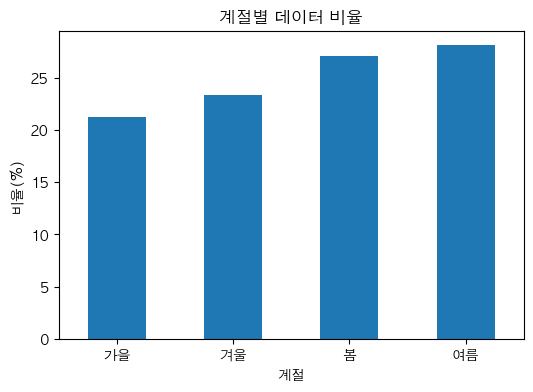

In [8]:
def categorical_table(df, col):
    return (
        df[col]
        .value_counts(dropna=False)
        .to_frame("count")
        .assign(ratio=lambda x: (x["count"] / x["count"].sum() * 100).round(2))
    )

cat_season = categorical_table(df, "계절")
cat_covid  = categorical_table(df, "코로나여부")

cat_season, cat_covid

season_ratio = (
    df['계절']
    .value_counts(normalize=True)
    .sort_index() * 100
)

plt.figure(figsize=(6,4))
season_ratio.plot(kind='bar')
plt.title("계절별 데이터 비율")
plt.ylabel("비율(%)")
plt.xlabel("계절")
plt.xticks(rotation=0)
plt.savefig("./outputs/figure/2.계절별데이터비율.png", dpi=300, bbox_inches="tight")

plt.show()


In [9]:
import pandas as pd

def preprocess_sales_overwrite_EA(df):
    df = df.copy()

    # 1) 판매/반품 분리
    df['sales_tmp'] = df['EA'].apply(lambda x: x if x > 0 else 0)
    df['returns_tmp'] = df['EA'].apply(lambda x: abs(x) if x < 0 else 0)

    # 2) 그룹 키
    group_keys = ['판매일', '주소', '상품명_cleaned']

    # 3) 그룹 단위 판매/반품 합산
    grouped = (
        df.groupby(group_keys)
          .agg({
              'sales_tmp': 'sum',
              'returns_tmp': 'sum'
          })
          .reset_index()
    )

    # 4) 순판매량 계산 후 음수 → 0 처리
    grouped['EA_clean'] = (grouped['sales_tmp'] - grouped['returns_tmp']).clip(lower=0)

    # 5) 원본 DF 에 다시 merge → 다른 컬럼 보존됨
    df = df.merge(grouped[group_keys + ['EA_clean']], on=group_keys, how='left')

    # 6) EA 업데이트
    df['EA'] = df['EA_clean']

    # 7) tmp 컬럼 제거
    df = df.drop(columns=['sales_tmp', 'returns_tmp', 'EA_clean'])

    return df


/var/folders/vb/l82fh6s517b1pnd0hbxzwt240000gn/T/ipykernel_81733/3580206994.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


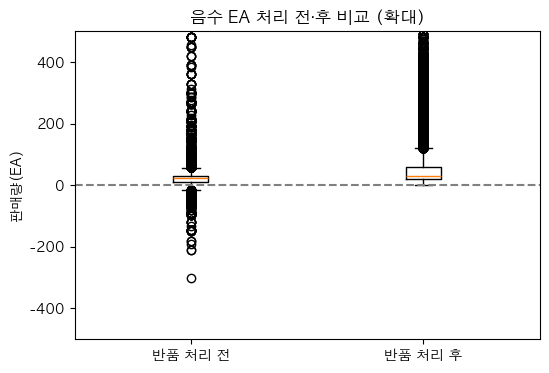

In [10]:
df_before = df.copy()
df_after = preprocess_sales_overwrite_EA(df)
plt.figure(figsize=(6,4))
plt.boxplot(
    [df_before['EA'], df_after['EA']],
    labels=['반품 처리 전', '반품 처리 후'],
    showfliers=True
)
plt.ylim(-500, 500)   # 🔥 핵심
plt.axhline(0, linestyle='--', color='gray')

plt.title("음수 EA 처리 전·후 비교 (확대)")
plt.ylabel("판매량(EA)")
plt.savefig("./outputs/figure/2.음수EA처리전후비교.png", dpi=300, bbox_inches="tight")
plt.show()



In [11]:
df = preprocess_sales_overwrite_EA(df)
print("\n반품 처리 후 shape:", df.shape)


반품 처리 후 shape: (42866, 19)


In [12]:
output_path = "./outputs/data/df_2.csv"
df.to_csv(output_path, index=False)
print(f"DataFrame을 {output_path} 에 성공적으로 저장했습니다.")


DataFrame을 ./outputs/data/df_2.csv 에 성공적으로 저장했습니다.
